Extension work: Rolling a Six

In these exercises we model the process of rolling a dice until we get a six

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/dice.jpg" width=25% alt="(display image of dice)" >

We will meet the `while` loop, which is different from the more familiar 
`for` loop


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Simulation of rolling a dice til you get a six


In many children's games, players need to roll a six before their counter can start moving round the board.

<ul>
<li>What is the probability that you will need four or more tries to roll a six?
</ul>

You may recall from school maths that the way we work this out is to calculate the probability that we did *not* obtain a six on any of rolls 1, 2 or 3. As the dice has six sides, the probability of not obtaining a six on each dice roll is $\frac{5}{6}$

As each event is independent, we can multiply the probabilities together:

$$ \frac{5}{6} \times \frac{5}{6} \times \frac{5}{6} = \frac{125}{216}$$

In other words, the chance that a player needs four or more turns to roll a six is slightly over half.

### `while` loop

If we want to simulate rolling a dice til we get a six, we need to use the `while` loop.

The `while` loop is a loop that keeps repeating until some criterion is fulfilled.

This is in contrast to the `for` loop which is run for a fixed number of cycles.

Try running the code below a few times - you should get a different outcome each time

In [2]:
r = 0 # create the variable r which counts how many times we rolled the virtual dice
d = 0 # create the variable d1 which stores the outcome of each dice roll

while d!=6:
    r = r+1 # increase r by 1 each time we go round the loop
    d = np.random.randint(1,7)
    print('roll ' + str(r) + '. Outcome = ' + str(d))

# the value of r when we leave the loop is how many rolls were needed to get a six
print('Total rolls needed to get a six: ' + str(r))

roll 1. Outcome = 5
roll 2. Outcome = 2
roll 3. Outcome = 4
roll 4. Outcome = 5
roll 5. Outcome = 1
roll 6. Outcome = 4
roll 7. Outcome = 6
Total rolls needed to get a six: 7


What happened there?

The code

`while d!=6:`

means "check if the value of `d` is 6; if not, repeat the commands inside the loop and come back to check again"

Initially `d=0` (because that was the value we initially gave it).

Each time we 'roll the dice' we give `d` a new value and come back to check if it is now a six.

On each pass through the loop we also increment `r` (increase the value of `r` by one) to count how many times we rolled the dice.

When a six is obtained (`d=6`) we stop going round the loop. The value of `r` at that point tells us how many rolls were needed to obtian a six.

**Comprehension questions**
* Change the code above so the dice is rolled until we get a one, instead of a six
    * Look at the output text and check that the loop does indeed terminate on rolling a 1, not a 6.
* Change the code above to model a 16-sided dice instead of a six sided dice. 
    * It should generally take longer to roll a six on a dice with more sides!  Check this by running the loop a few times.




## Repeated `while` loop

How often do we need to wait 2,3,4 or more trials to get a six?

We can simulate this by repeating our <tt>while</tt> loop lots of times and each time, 
recording how many times we needed to roll the dice to get a six.

You can think of each repeat of the 'experiment' as one player trying to roll a six and recording how many rolls it took to get one.

In [3]:
# let's start by simulating 10 'players' each trying to get a six
nPlayers = 10
outcomes = np.empty(nPlayers)

for i in range(nPlayers):

    # copy the code for a single player here!
    
    # the value of r when we leave the loop is how many rolls were needed to get a six
    outcomes[i] = r

We should have created an array of 10 numbers, each of which is the number of rolls a player needed to get a six. 

Let's check what's in there.

In [4]:
# Your code here to check the outcomes for the 10 players

That was a list of the number of rolls needed to get a six for each of the 10 players.

Run the simulation again - the answer should have changed.

How many times did someone need 5 or more rolls to get a six?

In [5]:
# Your code here

### Distribution of outcomes

Overall, what is the most likely number of rolls needed to get a six?

Let's simulate loads of players and plot a histogram of how often we need 1,2,3,4... etc rolls to get a six.


In [6]:
# your code here to simulate 10000 players

# UNCOMMMENT THIS TO PLOT THE OUTCOMES
# plot a histogram of the outcomes
#sns.histplot(outcomes, bins=np.arange(max(outcomes)))
#plt.xlabel('rolls needed to get a six')
#plt.show()

Did it surprise you that the most likely number of rolls needed (mode of the distribution) is 1?

When you think about it:
* The chance of getting a six on Roll 1 is $\frac{1}{6}$
* The chance of getting a six on Roll 2 is $\frac{1}{6} \times \frac{5}{6}$, that is, the chance of a six on Roll 2, multiplied by the chance of NO six on Roll 1 (as you wouldn't have done a second roll if the first roll had yielded a six)
* The chance of getting a six on Roll 3 is $\frac{1}{6} \times \frac{5}{6} \times \frac{5}{6}$ ...


The distribution shown above is called a *Geometric* distribution

$$ r \sim \mathcal{Geo}(\frac{1}{6}) $$

## Expected number of rolls

Although the most likely single outcome (the mode of the distribution) is one roll needed to get a six, the *mean* or *expected* number of rolls is not 1.

We can work out the mean number of rolls needed using `np.mean`:

In [7]:
# Your code here

Hopefully you get an answer close to six.

This means that, in the long run, a person should expect to need about 6 rolls to get a 6, or put another way, if we carry on rolling the dice, we expect to get a six about 1/6 of the time. Which is unsurprising!

## Frequency of extreme outcomes

How often did we need over 12 rolls to get a six?

You should be able to work it out using Python code (I make it about 11% of the time):

In [8]:
# Your code here

## Expected frequency of sixes in $n$ rolls

Let's adapt our dice-rolling code to count how many sixes we get, if we just keep rolling the dice a lot of times - let's say 100 rolls.

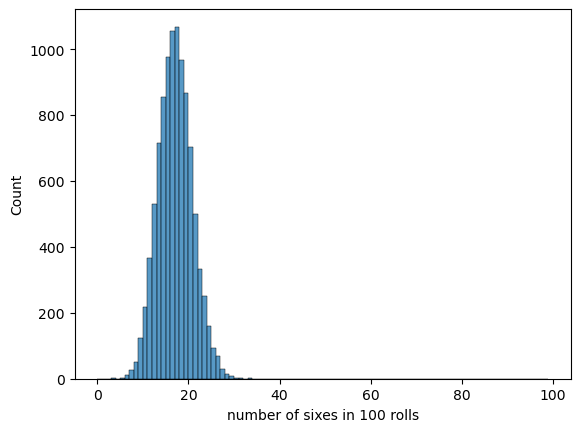

In [9]:
# let's simulate 10,000 players
nPlayers = 10000
nRolls = 100 # number of tiems each player rolls the dice
outcomes = np.empty(nPlayers)

for i in range(nPlayers):

    s = 0 # count the sixes
    d = 0 # create the variable d1 which stores the outcome of each dice roll

    for r in range(nRolls):
        d = np.random.randint(1,7)
        if d==6:
            s = s+1
    
    # the value of s when we leave the loop is how many sixes we got in nRolls
    outcomes[i] = s
    
# plot a histogram of the outcomes
sns.histplot(outcomes, bins=range(nRolls))
plt.xlabel('number of sixes in ' + str(nRolls) + ' rolls')
plt.show()

* The most likely number of sixes is 16 or 17 ($\frac{100}{6} = 16.67$)

The eagle-eyed amongst you may have noticed that counting the number of sixes in a hundred dice rolls is actually a binomial-type problem, and we could have generated the graph above rather more easily!

Can you put together some code to plot the number of sixes in 100 dice rolls, for 10,000 simulated 'players'?

In [10]:
# your code here
# k = [commplete it yourself!]


# UNCOMMEMNT THIS CODE TO PLOT THE DATA
#sns.histplot(k, bins=range(nRolls))
#plt.xlabel('number of sixes in ' + str(nRolls) + ' rolls')
#plt.show()

## What am I modelling?

In these exercises we saw two different ways of modelling the physical process (rolling a six)

* we looked at the frequency of the outcome of interest (a six) in a fixed number of trials (`nRolls`):

$$ k \sim \mathcal{B}(nRolls, \frac{1}{6})$$

* we looked at the distribution of *intervals* between the sixes 

$$ r \sim \mathcal{Geo}(\frac{1}{6}) $$

So the appropriate model depends on what *outcome* we want to model (are we interested in how many sixes we roll over the course of a game, or how long it takes to get that first six we need to leave the start square?)

### Applications in neuroscience

Modelling the intervals between events and modelling the number of events in a time window are both of interest in many fields of study. For example, in neuroscience we might be interested in a single neuron.

* A detailed model of the neuron saying when exactly it emits an action potential mimght look like our first `while` loop model
* A summary of its firing rate (the mean number of action potentials in a time window) will look more like the second model